Include all dependencies:

In [67]:
import numpy as np

def gauss1D(m, v, N, w):
    pos = np.arange(-w, w - w / N, 2 * w / N)
    insE = -0.5 * ((pos - m) / v) ** 2
    norm = 1 / (v * np.sqrt(2 * np.pi))
    res = norm * np.exp(insE)
    realDensity = np.stack((pos, res), axis=1)
    return realDensity

def parameters():
    k = 20  # k nearest neighbours
    return k

Calculate the k-nearest neighbours using the samples for the pos vector:

In [68]:
def knn(samples, k):
    # compute density estimation from samples with KNN
    # Input
    #  samples    : DxN matrix of data points
    #  k          : number of neighbors
    # Output
    #  estDensity : estimated density in the range of [-5, 5]

    #####Insert your code here for subtask 5b#####
    # Compute the number of the samples created
    n = len(samples)
    
    #Create a linearly spaced array
    pos = np.arange(-5,5.0, 0.1)

    #Distance of each pos in pos from the samples
    dist = np.sort(np.abs(pos[np.newaxis, :] - samples[:, np.newaxis]), axis=0)
    
    # Density estimation using the k-NN density estimation
    D_est = (k / (2 * n)) / dist[k - 1, :]

    # Form the output variable
    estDensity = np.stack((pos, D_est), axis=1)
    
    return estDensity

Visualizing results: 

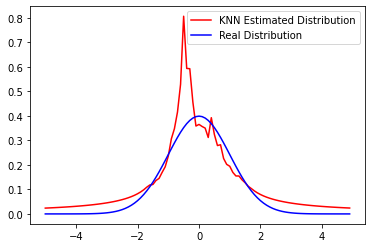

In [69]:
import matplotlib.pyplot as plt

k = parameters()

# Produce the random samples
samples = np.random.normal(0, 1, 100)

# Compute the original normal distribution
realDensity = gauss1D(0, 1, 100, 5)

# Estimate the probability density using KNN
estDensity = knn(samples, k)

# Plot the distributions
plt.plot(estDensity[:, 0], estDensity[:, 1], 'r', linewidth=1.5, label='KNN Estimated Distribution')
plt.plot(realDensity[:, 0], realDensity[:, 1], 'b', linewidth=1.5, label='Real Distribution')
plt.legend()
plt.show()